# Variational Quantum Classifier


In this notebook, we are going to train Aqua's Variational Quantum Classifier to classify instances of a dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import Aer
from qiskit.ml.datasets import breast_cancer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library.n_local.two_local import TwoLocal
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import VQC
from qiskit.aqua.components.optimizers import COBYLA

C:\Users\mlabadm\AppData\Local\Programs\Python\Python39\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
C:\Users\mlabadm\AppData\Local\Programs\Python\Python39\lib\site-packages\qiskit\ml\__init__.py:40: DeprecationWarning: The package qiskit.ml is deprecated. It was moved/refactored to qiskit_machine_learning (pip install qiskit-machine-learning). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('ml', 'qiskit_machine_learning', 'qiskit-machine-learning')


We choose the feature map and the variational form

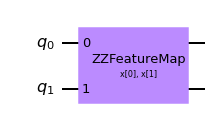

In [2]:
feature_map = ZZFeatureMap(feature_dimension=2, reps=1, entanglement='linear')
feature_map.draw(output="mpl")

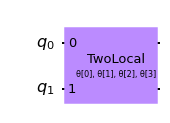

In [3]:
var_form = TwoLocal(num_qubits=2, rotation_blocks = 'ry', entanglement_blocks = 'cx', entanglement = 'linear', reps = 1)
var_form.draw(output="mpl")

We create the training dataset

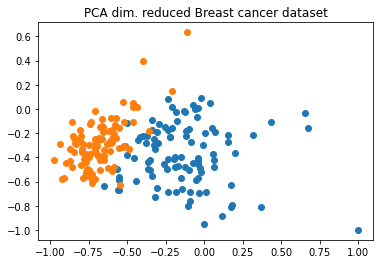

In [4]:
sample_Total, training_input, test_input, class_labels = breast_cancer(
    training_size=100,
    test_size=10,
    n=2,
    plot_data=True
)

After we have generated the training data and defined the feature map and variational form, we can now train the VQC. 

In [5]:
backend = Aer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend)
optimizer = COBYLA()
vqc = VQC(optimizer = optimizer, feature_map = feature_map, var_form = var_form, 
          training_dataset = training_input, test_dataset = test_input)
result = vqc.run(quantum_instance)
print(result)

C:\Users\mlabadm\AppData\Local\Programs\Python\Python39\lib\site-packages\qiskit\aqua\quantum_instance.py:135: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_class('aqua.QuantumInstance',
C:\Users\mlabadm\AppData\Local\Programs\Python\Python39\lib\site-packages\qiskit\aqua\components\optimizers\optimizer.py:49: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua.components.optimizers',
C:\Users\mlabadm\AppData\Local\Programs\Python\Python39\lib\site-packages\qiskit\aqua\algorithms\classifiers\vqc.py:96: DeprecationWarning: The package qiskit

{'num_optimizer_evals': 72, 'min_val': 0.5233992569865056, 'opt_params': array([ 1.23412482, -0.35213877,  0.62437125,  2.26213222]), 'eval_time': 54.14044404029846, 'eval_count': 72, 'training_loss': 0.5233992569865056, 'testing_accuracy': 0.8, 'test_success_ratio': 0.8, 'testing_loss': 0.552718709105396}


We now select more complicated feature maps and variational forms

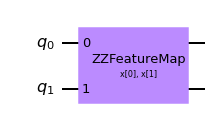

In [6]:
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
feature_map.draw(output="mpl")

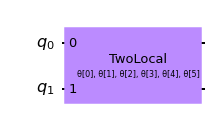

In [7]:
var_form = TwoLocal(num_qubits=2, rotation_blocks = 'ry', entanglement_blocks = 'cx', entanglement = 'linear', reps = 2)
var_form.draw(output="mpl")

And we train again the VQC

In [8]:
vqc = VQC(optimizer = optimizer, feature_map = feature_map, var_form = var_form, 
          training_dataset = training_input, test_dataset = test_input)
result = vqc.run(quantum_instance)
print(result)

{'num_optimizer_evals': 86, 'min_val': 0.450287199028748, 'opt_params': array([-1.49695459, -0.83525776,  2.04912075,  1.60456416,  1.97610226,
       -1.0310025 ]), 'eval_time': 82.35727500915527, 'eval_count': 86, 'training_loss': 0.450287199028748, 'testing_accuracy': 0.9, 'test_success_ratio': 0.9, 'testing_loss': 0.4078212616843405}
